In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_processing import csv_data
from datetime import datetime, timedelta
from calendar import monthrange
import json
import pmdarima as pm

In [19]:
dataClass = csv_data("../data/urgence3.csv")

c:\users\sofiane\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3347: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [20]:
patient_ts = []
start_d, start_m, start_y = 30, 9, 2020
dt = datetime(start_y, start_m, start_d)
days = 5
for _ in range(days):
    patient_ts += dataClass.return_daily(dt.year, dt.month, dt.day)
    dt -= timedelta(days = 1)
patient_ts = np.array(patient_ts)

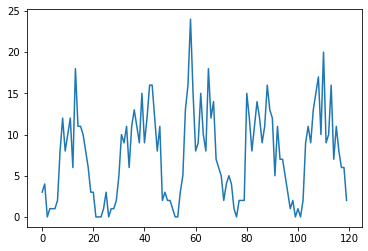

In [21]:
# plt.figure(figsize=(13, 7))
plt.plot(patient_ts)

In [22]:
sample = patient_ts[0:-24]
stepwise_fit = pm.auto_arima(sample.astype(np.float64), seasonal=True,
                             start_p=1, start_q=1,m = 24,
                             max_p=3, max_q=3,
                             d=1, D=1, trace=True,
                             start_P=0,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwis

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=1.73 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=463.448, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=436.005, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=456.810, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=430.498, Time=1.97 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=10.93 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=440.126, Time=1.20 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=425.702, Time=2.33 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=432.107, Time=0.38 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=427.705, Time=4.26 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=1.99 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=inf, Time=2.92 sec
 ARIMA(2,1,1)(2,1,0)[24]             : AIC=inf, Time=9.8

In [23]:
# stepwise_fit.summary()

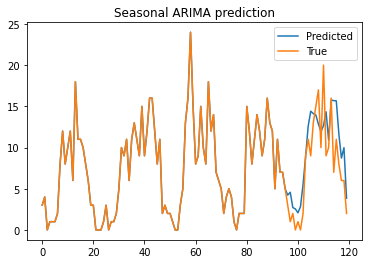

In [25]:
plt.plot(np.concatenate((sample, stepwise_fit.predict(n_periods=24))), label= "Predicted")
plt.plot(patient_ts, label = "True")
plt.title("Seasonal ARIMA prediction")
plt.legend()